#AutoKeras for Regression Task

# Installation

In [1]:
!sudo pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-90xi7tup
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-90xi7tup
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85445 sha256=a780edf5de6ac318d9e640d8f6279a162317ffa8e9500c0ac62b5d9762c185b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-qrkkb0oj/wheels/44/e5/92/e83049ca00432aec622a4fa0200e254d88aefae9d74aa86941
Successfully built keras-tuner


In [2]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.0 MB/s 
     |████████████████████████████████| 135 kB 53.2 MB/s 
     |████████████████████████████████| 1.6 MB 45.9 MB/s 
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc1
    Uninstalling keras-tuner-1.0.2rc1:
      Successfully uninstalled keras-tuner-1.0.2rc1


In [3]:
!pip show autokeras

Name: autokeras
Version: 1.0.20
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: tensorflow, keras-tuner, pandas, packaging
Required-by: 


In [4]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import plot_model

# Regression:
## Dataset source:-

https://www.kaggle.com/mirichoi0218/insurance


6 features and label - insurance charges

In [6]:
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/insurance.csv'

--2022-09-08 07:36:00--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54289 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2022-09-08 07:36:00 (5.00 MB/s) - ‘insurance.csv’ saved [54289/54289]



In [7]:
df2 = pd.read_csv('/content/insurance.csv')

In [8]:
df2['sex']=df2['sex'].replace('male',1).replace('female',0)

In [9]:
df2['smoker']=df2['smoker'].replace('yes',1).replace('no',0)

In [10]:
df2 = pd.get_dummies(df2, columns=['region'], drop_first=True) #To avoid multicollinearity

In [11]:
df2.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
df_num=df2[['age','bmi','children']]   #Numerical columns

In [14]:
pf = PolynomialFeatures(degree=2, include_bias=False)
df2_pf = pf.fit_transform(df_num)

In [15]:
df2_pf.shape

(1338, 9)

In [16]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(df_num.columns,p) for p in pf.powers_]]
output_df = pd.DataFrame(df2_pf, columns = target_feature_names, index=df2.index)

In [17]:
output_df.head()

,age^1,bmi^1,children^1,age^2,age^1xbmi^1,age^1xchildren^1,bmi^2,bmi^1xchildren^1,children^2
0,19.0,27.900,0.0,361.0,530.100,0.0,778.410000,0.00,0.0
1,18.0,33.770,1.0,324.0,607.860,18.0,1140.412900,33.77,1.0
2,28.0,33.000,3.0,784.0,924.000,84.0,1089.000000,99.00,9.0
3,33.0,22.705,0.0,1089.0,749.265,0.0,515.517025,0.00,0.0
4,32.0,28.880,0.0,1024.0,924.160,0.0,834.054400,0.00,0.0


In [18]:
df2.drop(['age','bmi','children'], axis=1, inplace=True)

In [19]:
df2 = pd.concat((df2, output_df), axis=1)

In [20]:
label=np.log(df2['charges'])

In [21]:
df2.drop(['charges'], axis=1, inplace=True)

In [22]:
df2

,sex,smoker,region_northwest,region_southeast,region_southwest,age^1,bmi^1,children^1,age^2,age^1xbmi^1,age^1xchildren^1,bmi^2,bmi^1xchildren^1,children^2
0,0,1,0,0,1,19.0,27.900,0.0,361.0,530.100,0.0,778.410000,0.00,0.0
1,1,0,0,1,0,18.0,33.770,1.0,324.0,607.860,18.0,1140.412900,33.77,1.0
2,1,0,0,1,0,28.0,33.000,3.0,784.0,924.000,84.0,1089.000000,99.00,9.0
3,1,0,1,0,0,33.0,22.705,0.0,1089.0,749.265,0.0,515.517025,0.00,0.0
4,1,0,1,0,0,32.0,28.880,0.0,1024.0,924.160,0.0,834.054400,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,0,1,0,0,50.0,30.970,3.0,2500.0,1548.500,150.0,959.140900,92.91,9.0
1334,0,0,0,0,0,18.0,31.920,0.0,324.0,574.560,0.0,1018.886400,0.00,0.0
1335,0,0,0,1,0,18.0,36.850,0.0,324.0,663.300,0.0,1357.922500,0.00,0.0
1336,0,0,0,0,1,21.0,25.800,0.0,441.0,541.800,0.0,665.640000,0.00,0.0


Function for displaying error metrics

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def error_metrics(y_pred,y_val):
  print('MSE: ',mean_squared_error(y_pred,y_val))
  print('RMSE: ',np.sqrt(mean_squared_error(y_pred,y_val)))
  print('Coefficient of determination: ',r2_score(y_pred,y_val))

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, label_train, label_val = train_test_split(df2, label, test_size=0.15, random_state=42)

In [25]:
X_train.shape, label_train.shape, X_val.shape, label_val.shape

((1137, 14), (1137,), (201, 14), (201,))

In [26]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_scaled = s.fit_transform(X_train)
X_val_scaled = s.transform(X_val)

# StructuredDataRegressor
Arguments
- max_trials: Is the number of different networks that will be evaluated
- loss: Loss function to be used for optimization

Note: I observed an unacceptable model accuracy with 100 epochs. Thus, it is set to 200 here.

In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='mean_squared_error',
                                 patience=1, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.000001)

In [28]:
from autokeras import StructuredDataRegressor

regressor = StructuredDataRegressor(max_trials=3, loss='mean_absolute_error')
regressor.fit(x=X_train_scaled, y=label_train,
              callbacks=[lr_reduction],
              verbose=0, epochs=200)


Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 46: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 47: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 52: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 53: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 55: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 56: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 21: ReduceLROnPlateau reducing learning rate to 6.250000

# Model evaluation

In [29]:
mae, mse = regressor.evaluate(X_val_scaled, label_val, verbose=0)

In [30]:
label_predicted = regressor.predict(X_val_scaled)

7/7 [==============================] - 0s 2ms/step


In [31]:
error_metrics(label_predicted,label_val)

MSE:  0.1454156598886664
RMSE:  0.3813340528836448
Coefficient of determination:  0.8358193550766033


# Generated network model

In [32]:
model = regressor.export_model()

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 14)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 14)               29        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                480       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

# Model plot

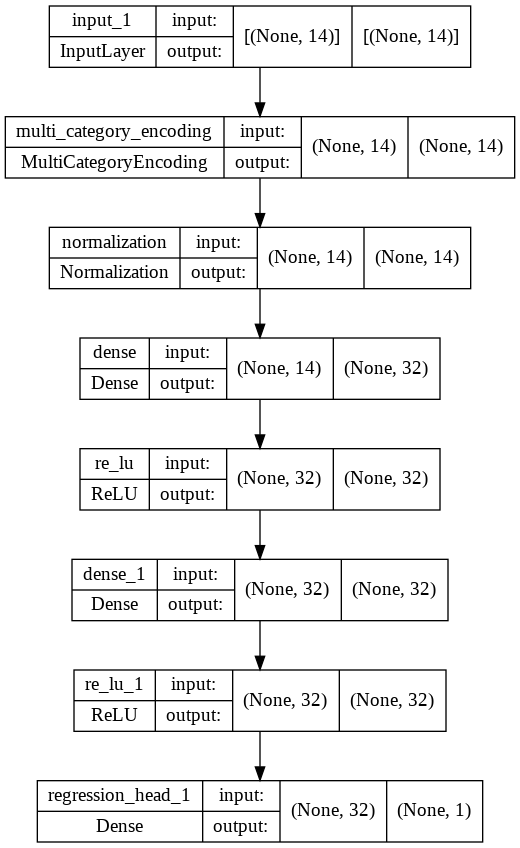

In [34]:
plot_model(model, show_shapes=True, show_layer_names=True)